In [1]:
import numpy as np
import pandas as pd
import xgboost
import sklearn
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
train_all_df = pd.read_csv('../input/spaceship-titanic/train.csv')
test_all_df = pd.read_csv('../input/spaceship-titanic/test.csv')

# Some data exploration

In [65]:
train_all_df[train_all_df["Transported"] == True].iloc[15:20, :]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
33,0031_01,Mars,False,F/9/P,TRAPPIST-1e,47.0,False,214.0,0.0,1411.0,0.0,1229.0,Coobix Datie,True
34,0031_02,Mars,False,F/9/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Cinets Datie,True
35,0031_03,Mars,False,F/9/P,TRAPPIST-1e,20.0,False,NaN,0.0,1750.0,990.0,0.0,Dontch Datie,True
36,0034_01,Europa,True,D/1/S,55 Cancri e,28.0,False,0.0,0.0,0.0,0.0,0.0,Ziba Oingwhedly,True
41,0041_01,Earth,True,G/2/P,TRAPPIST-1e,17.0,False,0.0,0.0,0.0,0.0,0.0,Margia Moodsey,True


In [3]:
train_all_df.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True
6121,6458_01,Mars,False,E/431/S,TRAPPIST-1e,14.0,False,0.0,0.0,0.0,0.0,0.0,Whead Swin,False
7102,7569_01,Mars,False,E/493/P,TRAPPIST-1e,18.0,False,3591.0,0.0,158.0,0.0,120.0,Gamuls Sune,False
6999,7444_01,Earth,True,G/1203/P,TRAPPIST-1e,17.0,False,0.0,0.0,NaN,0.0,0.0,Kenny Thorney,False
5653,6011_01,Earth,False,F/1239/P,TRAPPIST-1e,58.0,False,0.0,0.0,0.0,1989.0,18.0,Kurta Hoodgers,False


In [4]:
train_all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
test_all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [6]:
object_cols = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP", "Name", "PassengerId"]
for col in object_cols:
    print("Col: {}".format(col))
    print("Unique values in train: ", train_all_df[col].unique())
    print("Unique values in test: ", test_all_df[col].unique())

Col: HomePlanet
Unique values in train:  ['Europa' 'Earth' 'Mars' nan]
Unique values in test:  ['Earth' 'Europa' 'Mars' nan]
Col: CryoSleep
Unique values in train:  [False True nan]
Unique values in test:  [True False nan]
Col: Cabin
Unique values in train:  ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Unique values in test:  ['G/3/S' 'F/4/S' 'C/0/S' ... 'D/296/P' 'D/297/P' 'G/1498/S']
Col: Destination
Unique values in train:  ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Unique values in test:  ['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22' nan]
Col: VIP
Unique values in train:  [False True nan]
Unique values in test:  [False nan True]
Col: Name
Unique values in train:  ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']
Unique values in test:  ['Nelly Carsoning' 'Lerome Peckers' 'Sabih Unhearfus' ... 'Jayrin Pore'
 'Kitakan Conale' 'Lilace Leonzaley']
Col: PassengerId
Unique values in train:  ['0001_01' '0002

In [7]:
# passenger_id suffix indicate group
print("Unique suffixes in passenger_id for train: ", train_all_df["PassengerId"].str.split("_", expand=True)[1].unique())
print("Unique suffixes in passenger_id for test: ", test_all_df["PassengerId"].str.split("_", expand=True)[1].unique())
print("------\n")

# cabin has three levels, may be important separately
# second level may be range of numbers, check using methods
is_range = lambda l: len(l) == max(l) - min(l) + 1
format_list = lambda l: f"[{min(l)} - {max(l)}]" if is_range(l) else l
print("Unique first level in cabin for train: ", train_all_df["Cabin"].str.split("/", expand=True)[0].unique())
print("Unique second level in cabin for train: ", format_list(train_all_df["Cabin"].str.split("/", expand=True)[1].dropna().astype(int).unique()))
print("Unique third level in cabin for train: ", train_all_df["Cabin"].str.split("/", expand=True)[2].unique())
print("Unique first level in cabin for test: ", test_all_df["Cabin"].str.split("/", expand=True)[0].unique())
print("Unique second level in cabin for test: ", format_list(test_all_df["Cabin"].str.split("/", expand=True)[1].dropna().astype(int).unique()))
print("Unique third level in cabin for test: ", test_all_df["Cabin"].str.split("/", expand=True)[2].unique())
print("-------\n")

# name can be first or last
print("Unique first name for train: ", train_all_df["Name"].str.split(" ", expand=True)[0].unique())
print("Unique last name for train: ", train_all_df["Name"].str.split(" ", expand=True)[1].unique())
print("Unique first name for test: ", test_all_df["Name"].str.split(" ", expand=True)[0].unique())
print("Unique last name for test: ", test_all_df["Name"].str.split(" ", expand=True)[1].unique())

Unique suffixes in passenger_id for train:  ['01' '02' '03' '04' '05' '06' '07' '08']
Unique suffixes in passenger_id for test:  ['01' '02' '03' '04' '05' '06' '07' '08']
------

Unique first level in cabin for train:  ['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T']
Unique second level in cabin for train:  [   0    1    2 ... 1892 1893 1894]
Unique third level in cabin for train:  ['P' 'S' nan]
Unique first level in cabin for test:  ['G' 'F' 'C' 'B' 'D' 'E' nan 'A' 'T']
Unique second level in cabin for test:  [   3    4    0 ... 1890 1794 1503]
Unique third level in cabin for test:  ['S' 'P' nan]
-------

Unique first name for train:  ['Maham' 'Juanna' 'Altark' ... 'Ants' 'Gian' 'Chain']
Unique last name for train:  ['Ofracculy' 'Vines' 'Susent' ... 'Fort' 'Workmanson' 'Sionerorly']
Unique first name for test:  ['Nelly' 'Lerome' 'Sabih' ... 'Beidus' 'Jeron' 'Jayrin']
Unique last name for test:  ['Carsoning' 'Peckers' 'Unhearfus' ... 'Roses' 'Pumpeshaft' 'Cure']


In [8]:
# check if test values are in train values
train_second_cabin = set(train_all_df["Cabin"].str.split("/", expand=True)[1].dropna().astype(int).unique())
test_second_cabin = set(test_all_df["Cabin"].str.split("/", expand=True)[1].dropna().astype(int).unique())
print("Count CabinNumber in train not in test: ", len(train_second_cabin - test_second_cabin))
print("Count CabinNumber in test not in train: ", len(test_second_cabin - train_second_cabin))
print("------\n")

train_first_name = set(train_all_df["Name"].str.split(" ", expand=True)[0].unique())
train_last_name = set(train_all_df["Name"].str.split(" ", expand=True)[1].unique())
test_first_name = set(test_all_df["Name"].str.split(" ", expand=True)[0].unique())
test_last_name = set(test_all_df["Name"].str.split(" ", expand=True)[1].unique())

print("Count first name in train not in test: ", len(train_first_name - test_first_name))
print("Count first name in test not in train: ", len(test_first_name - train_first_name))
print("Count last name in train not in test: ", len(train_last_name - test_last_name))
print("Count last name in test not in train: ", len(test_last_name - train_last_name))

Count CabinNumber in train not in test:  389
Count CabinNumber in test not in train:  77
------

Count first name in train not in test:  753
Count first name in test not in train:  177
Count last name in train not in test:  681
Count last name in test not in train:  189


In [9]:
# check if names have any promise, looks hard to use
print("Number of unique first names in train: ", len(train_first_name))
print("Maximum number of occurence of any first name in train: ", train_all_df["Name"].str.split(" ", expand=True)[0].value_counts().max())
print("Number of unique last names in train: ", len(train_last_name))
print("Maximum number of occurence of any last name in train: ", train_all_df["Name"].str.split(" ", expand=True)[1].value_counts().max())

# result suggests that name is too unique and not correlated with anything much
# feature should be dropped then

Number of unique first names in train:  2707
Maximum number of occurence of any first name in train:  13
Number of unique last names in train:  2218
Maximum number of occurence of any last name in train:  18


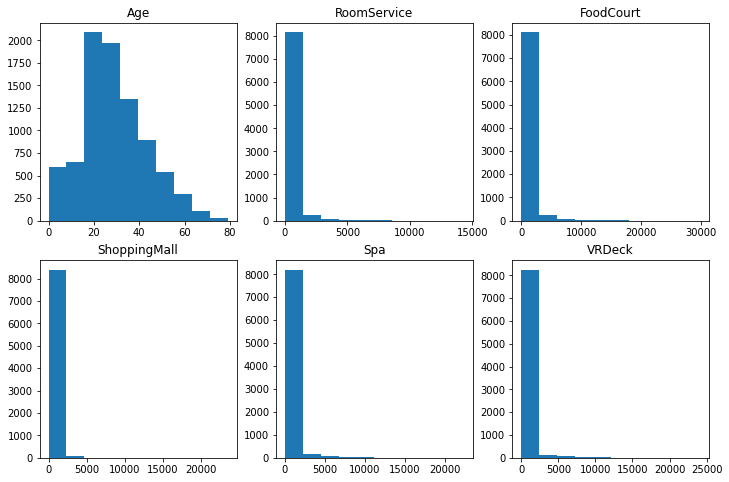

In [10]:
# check distribution of float variables to see if we need any cox/log transform
float_columns = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
spend_columns = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(4*3, 4*2))
for ax, col in zip(axs.ravel(), float_columns):
    ax.hist(train_all_df[col].dropna())
    ax.set_title(col)
plt.show()

# from the look of things, room service, food court, shopping mall, spa, and vrdeck probably need to be encoded 
# however, cryosleep people can't spend, so need to understand what would happen without them

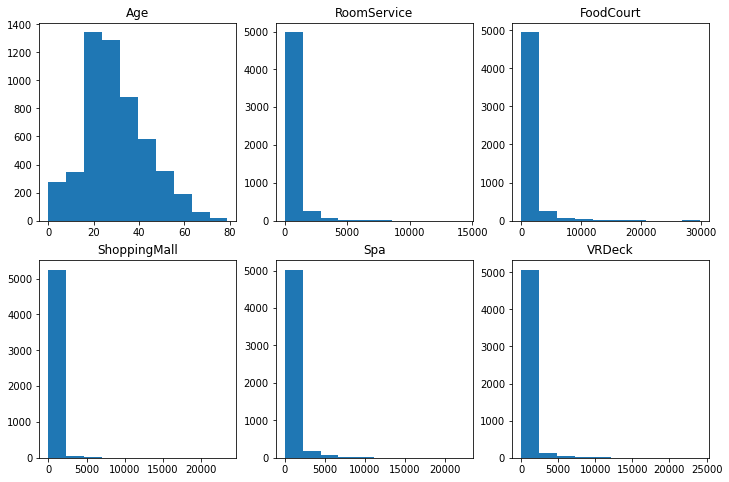

In [11]:
# check distribution of float variables for people who are not in cryosleep
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(4*3, 4*2))
for ax, col in zip(axs.ravel(), float_columns):
    ax.hist(train_all_df.loc[train_all_df["CryoSleep"] == False, col].dropna())
    ax.set_title(col)
plt.show()

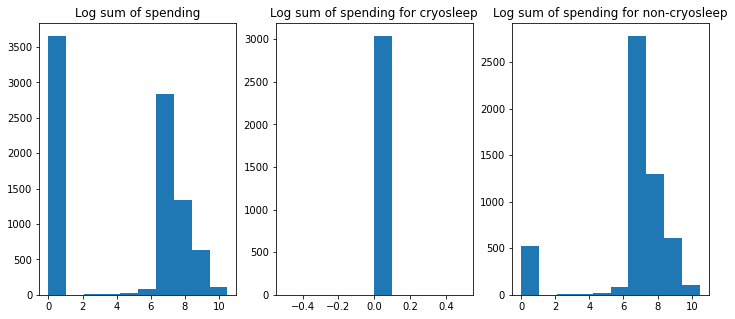

In [12]:
# test sum of spending
plt.figure(figsize=(12, 5))
plt.subplot(131)
plt.hist(np.log1p(train_all_df[spend_columns].sum(axis=1)))
plt.title("Log sum of spending")

plt.subplot(132)
plt.hist(np.log1p(train_all_df.loc[train_all_df["CryoSleep"] == True, spend_columns].sum(axis=1)))
plt.title("Log sum of spending for cryosleep")

plt.subplot(133)
plt.hist(np.log1p(train_all_df.loc[train_all_df["CryoSleep"] == False, spend_columns].sum(axis=1)))
plt.title("Log sum of spending for non-cryosleep")
plt.show()

# cryosleep kind of act as an indicator for people who won't spend anything, probably doesn't need a new indicator

In [13]:
# check if data is balanced or would require resampling
train_all_df["Transported"].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [14]:
# check if VIP has any correlation with spending or cryo sleep
print("Is cryo sleep related to VIP?")
print(train_all_df.groupby("CryoSleep")["VIP"].value_counts())
print("----------\n")
# not much, but if cryo sleep is false, you are more likely to be VIP (175/5300) vs (21/2960)

# check if VIP has any correlation with spending
vip_spend_analysis_df = train_all_df.copy()
vip_spend_analysis_df["TotalSpend"] = vip_spend_analysis_df[spend_columns].sum(axis=1)
spending_total_by_vip_status = vip_spend_analysis_df.groupby("VIP")["TotalSpend"].quantile(np.linspace(0, 1, 10))
print("Is VIP related to spending?")
print(spending_total_by_vip_status)
# VIP spend much more, but any given value 5000 is rare for both categories, so hard to use for imputation

Is cryo sleep related to VIP?
CryoSleep  VIP  
False      False    5143
           True      175
True       False    2941
           True       21
Name: VIP, dtype: int64
----------

Is VIP related to spending?
VIP            
False  0.000000        0.000000
       0.111111        0.000000
       0.222222        0.000000
       0.333333        0.000000
       0.444444      567.333333
       0.555556      786.000000
       0.666667      924.666667
       0.777778     1605.777778
       0.888889     3266.666667
       1.000000    35987.000000
True   0.000000        0.000000
       0.111111        0.000000
       0.222222     1173.000000
       0.333333     1698.000000
       0.444444     2389.000000
       0.555556     3157.000000
       0.666667     4519.000000
       0.777778     6634.000000
       0.888889     9766.000000
       1.000000    31076.000000
Name: TotalSpend, dtype: float64


# Some data processing

We first perform some intial preprocessing that won't be pipelined (i.e. tuned using CV) as they are straight-forward or essential

First, drop the unique ID and process concatenated strings

In [15]:
# dropping unique passenger id from training set, or it is a perfect predictor
def drop_passenger_id(df):
    """
    Drop passenger id from train and test set,
    Keeping the number of people the person is travelling with
    """
    df["GroupCode"] = df["PassengerId"].str.split("_", expand=True)[0]
    df["NumPeopleInGroup"] = df.groupby("GroupCode")["PassengerId"].transform("count")
    df = df.drop(columns=["GroupCode", "PassengerId"])
    return df

# split complex strings for cabin
def split_cabin(df):
    """Split Cabin column into constitutent parts"""
    splitted_columns = df["Cabin"].str.split("/", expand=True)
    splitted_columns.columns = ["CabinDeck", "CabinNum", "CabinSide"]
    splitted_columns["CabinNum"] = splitted_columns["CabinNum"].astype(float)
    df = pd.concat([
        df.drop(columns=["Cabin"]),
        splitted_columns
    ], axis=1)
    return df

# split names into component
def split_name(df):
    """Split Name into First and Last names"""
    splitted_columns = df["Name"].str.split(" ", expand=True)
    splitted_columns.columns = ["FirstName", "LastName"]
    df = pd.concat([
        df.drop(columns=["Name"]),
        splitted_columns
    ], axis=1)
    return df

In [16]:
train_df, label_df = train_all_df.copy().drop(columns=["Transported"]), train_all_df["Transported"].copy()
train_df = drop_passenger_id(train_df)
train_df = split_cabin(train_df)
train_df = split_name(train_df)

test_df = test_all_df.copy()
test_df = drop_passenger_id(test_df)
test_df = split_cabin(test_df)
test_df = split_name(test_df)

Third, perform any simple imputation we can use rules on

In [17]:
# if some one is cryo-sleeping, they aren't paying anything
train_df.loc[train_all_df["CryoSleep"] == True, spend_columns].fillna(0, inplace=True)
test_df.loc[train_all_df["CryoSleep"] == True, spend_columns].fillna(0, inplace=True)

# if some one is not paying anything, odds are they are cryo-sleeping
train_df.loc[(
    (train_all_df[spend_columns].sum(axis=1) == 0) & 
    (train_all_df["CryoSleep"].isna())
), "CryoSleep"] = True

# from earlier analysis, being VIP tends to make you pay a lot
# However, a thresholding approach doesn't work in filling empty values

Finally, drop all columns we cannot work with 

In [18]:
drop_columns = ["FirstName", "LastName"]
# since we are in a notebook, suppress error in case it is rerun
train_df.drop(columns=drop_columns, inplace=True, errors="ignore")
test_df.drop(columns=drop_columns, inplace=True, errors="ignore")

In [19]:
# take a look at data
train_df.sample(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,NumPeopleInGroup,CabinDeck,CabinNum,CabinSide
3745,Earth,True,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,5,G,660.0,S
1338,Europa,False,TRAPPIST-1e,41.0,False,0.0,184.0,0.0,1520.0,3358.0,1,C,54.0,S
7814,Europa,NaN,TRAPPIST-1e,22.0,False,0.0,3716.0,0.0,1098.0,2065.0,2,D,246.0,S


We now create a pipeline which we can tune using CV

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):
        self.feature_names = feature_names 
    
    def fit(self, X, y=None):
        return self 

    def transform(self, X, y=None):
        return X[self.feature_names] 
        
    def get_feature_names_out(self, input_features=None):
        return self.feature_names
    
class AddTotalSpend(BaseEstimator, TransformerMixin):
    def __init__(self, spend_columns):
        self.spend_columns = spend_columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy["TotalSpend"] = X[spend_columns].sum(axis=1)
        return X
    
    def get_feature_names_out(self, input_features=None):
        if input_features == None:
            return self.feature_names_in_ + ["TotalSpend"]
        return input_features + ["TotalSpend"]

In [78]:
# define our pipeline
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    OneHotEncoder, 
    StandardScaler, 
    PowerTransformer, 
    QuantileTransformer,
    PolynomialFeatures,
    KBinsDiscretizer
)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

from xgboost import XGBClassifier

categorical_columns =[
    "HomePlanet",
    "Destination",
    "CabinDeck",
    "CabinSide",
    "VIP",
    "CryoSleep",
]
    
numerical_columns = [
    "Age",
    "RoomService", 
    "FoodCourt", 
    "ShoppingMall", 
    "Spa", 
    "VRDeck", 
    "NumPeopleInGroup",
    "CabinNum"
]

categorical_pipeline = Pipeline([
    ("categorical_selector", FeatureSelector(categorical_columns)),
    ("categorical_simple_impute", SimpleImputer(strategy="most_frequent")),
    ("categorical_onehot", OneHotEncoder(sparse=False))
])

numerical_pipeline = Pipeline([
    ("numerical_selector", FeatureSelector(numerical_columns)),
    ("add_total_spend", AddTotalSpend(spend_columns)),
    ("numerical_iterative_imputer", IterativeImputer()),
    ("add_polynomial_series", PolynomialFeatures()),
#     ("numerical_power_transform", PowerTransformer(method="yeo-johnson")),
#     ("numerical_quantile", QuantileTransformer(output_distribution="normal")),
#     ("numerical_binner", KBinsDiscretizer(n_bins=3, encode="onehot-dense", strategy="quantile")),
    ("numerical_normalise", StandardScaler()),
])

preprocessing_pipeline = Pipeline([
    (
        "union_pipeline", 
        FeatureUnion(transformer_list=[
            ("categorical_pipeline", categorical_pipeline), 
            ("numerical_pipeline", numerical_pipeline)
        ])
    ),
])

# Playground

In [79]:
X = preprocessing_pipeline.fit_transform(train_df)
X = pd.DataFrame(X)
X.sample(2)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
4927,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.111266,-0.093440,-0.208320,-0.286018,-0.107956,-0.207523,-0.288599,0.79151,-0.224787,-0.696667
7759,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.111010,-0.081667,-0.190844,-0.088212,-0.073654,0.008216,2.255090,-0.48395,0.100790,1.455780


# Benchmark no preprocessing

In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

full_pipeline = Pipeline([
    ("preprocessing_pipeline", preprocessing_pipeline),
#     ("estimator", XGBClassifier())            # 0.77 accuracy with std 0.03
#     ("estimator", LogisticRegression(C=0.001))       # 0.79 accuracy with std 0.01 
#     ("estimator", RandomForestClassifier())   # 0.79 accuracy with std 0.03
#     ("estimator", DecisionTreeClassifier())   # 0.73 accuracy with std 0.02
    ("estimator", MLPClassifier(hidden_layer_sizes=(5, 2), alpha=0.01, max_iter=500)) #0.7959 accuracy with std 0.0196 <- best, a bit high std
])

scores = cross_val_score(full_pipeline, train_df, label_df, cv=8, error_score="raise")
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

0.7959 accuracy with a standard deviation of 0.0196


# Tabnet

# Final prediction

In [118]:
full_pipeline.fit(train_df, label_df)
prediction = full_pipeline.predict(test_df)

In [120]:
# write output csv
output_df = test_all_df[["PassengerId"]].copy()
output_df["Transported"] = prediction
output_df.to_csv("spaceship_titanic_prediction.csv", index=False)